In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Travel.csv')
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [ ]:
# EDA
df.shape

(4888, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [ ]:
df.Gender.unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [ ]:
df.replace('Fe Male' , 'Female' , inplace = True)
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df.isnull().sum().sort_values(ascending = False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [ ]:
round(((df.isnull().sum()/len(df.index)) * 100).sort_values(ascending = False),2)

DurationOfPitch             5.14
MonthlyIncome               4.77
Age                         4.62
NumberOfTrips               2.86
NumberOfChildrenVisiting    1.35
NumberOfFollowups           0.92
PreferredPropertyStar       0.53
TypeofContact               0.51
Designation                 0.00
OwnCar                      0.00
PitchSatisfactionScore      0.00
Passport                    0.00
CustomerID                  0.00
MaritalStatus               0.00
ProdTaken                   0.00
NumberOfPersonVisiting      0.00
Gender                      0.00
Occupation                  0.00
CityTier                    0.00
ProductPitched              0.00
dtype: float64

In [ ]:
df.dropna(axis = 0 , inplace = True)
round(((df.isnull().sum()/len(df.index)) * 100).sort_values(ascending = False),2)

CustomerID                  0.0
ProdTaken                   0.0
Designation                 0.0
NumberOfChildrenVisiting    0.0
OwnCar                      0.0
PitchSatisfactionScore      0.0
Passport                    0.0
NumberOfTrips               0.0
MaritalStatus               0.0
PreferredPropertyStar       0.0
ProductPitched              0.0
NumberOfFollowups           0.0
NumberOfPersonVisiting      0.0
Gender                      0.0
Occupation                  0.0
DurationOfPitch             0.0
CityTier                    0.0
TypeofContact               0.0
Age                         0.0
MonthlyIncome               0.0
dtype: float64

In [ ]:
df.shape

(4128, 20)

In [ ]:
df['ProdTaken'] = df['ProdTaken'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')
df['ProdTaken'] = df['ProdTaken'].astype('object')
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].astype('object')
df['Passport'] = df['Passport'].astype('object')
df['PitchSatisfactionScore'] = df['PitchSatisfactionScore'].astype('object')
df['OwnCar'] = df['OwnCar'].astype('object')

df.dtypes

CustomerID                    int64
ProdTaken                    object
Age                         float64
TypeofContact                object
CityTier                     object
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar        object
MaritalStatus                object
NumberOfTrips               float64
Passport                     object
PitchSatisfactionScore       object
OwnCar                       object
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [ ]:
cats = [col for col in df.columns if df[col].dtype == 'O']
nums = [col for col in df.columns if df[col].dtype != 'O']

cats
nums

['CustomerID',
 'Age',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

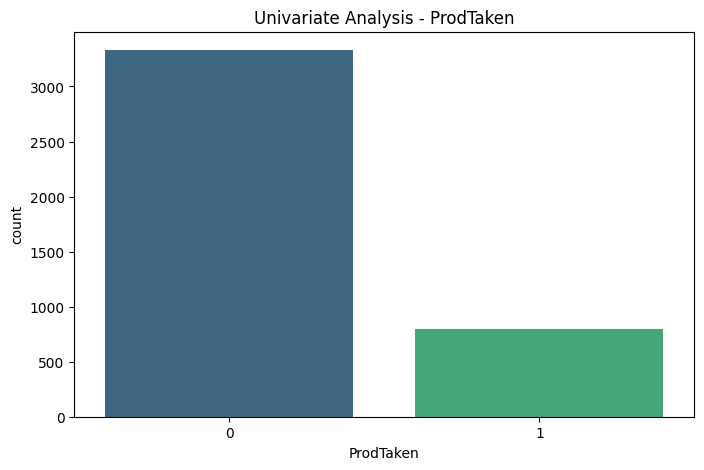

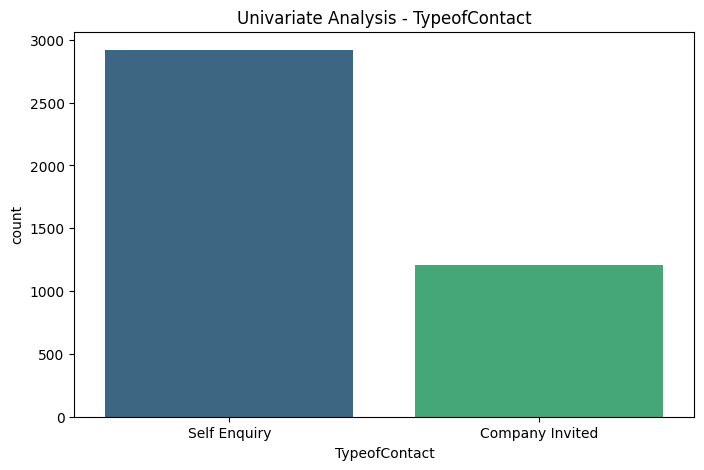

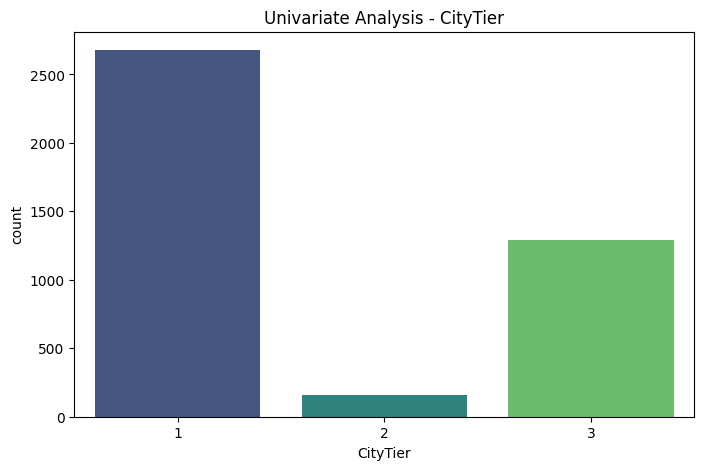

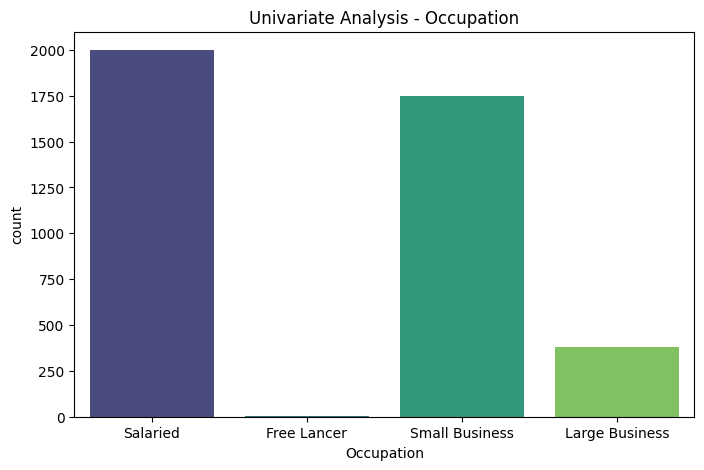

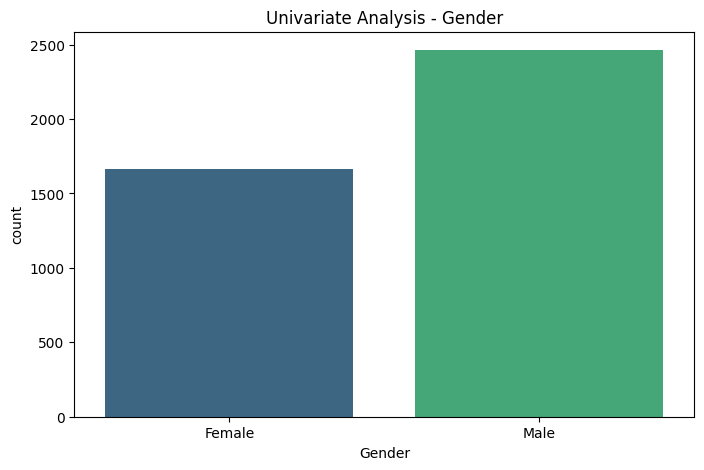

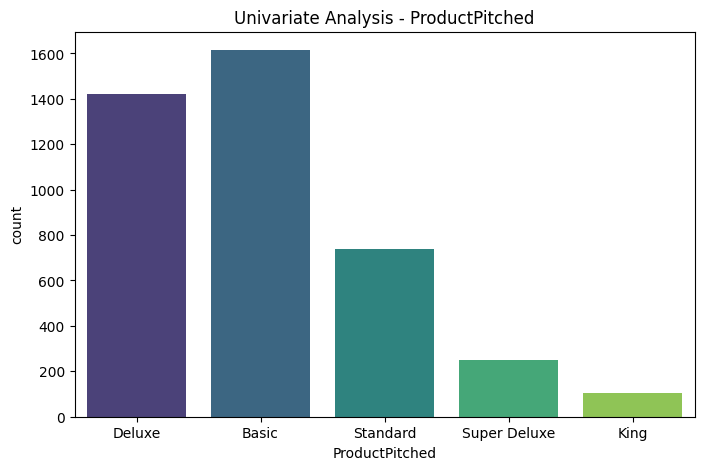

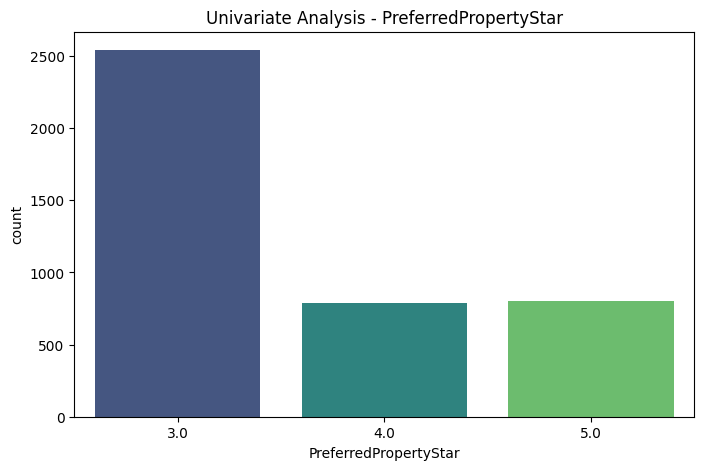

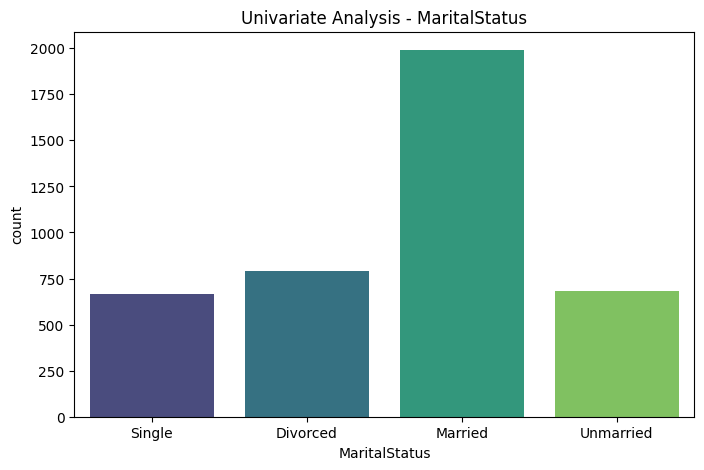

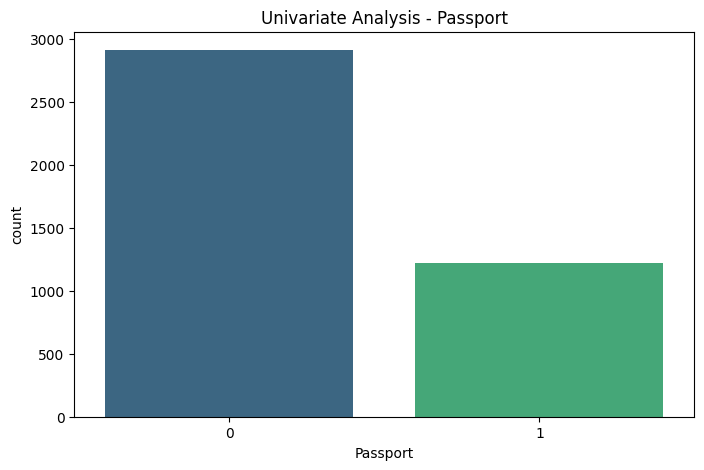

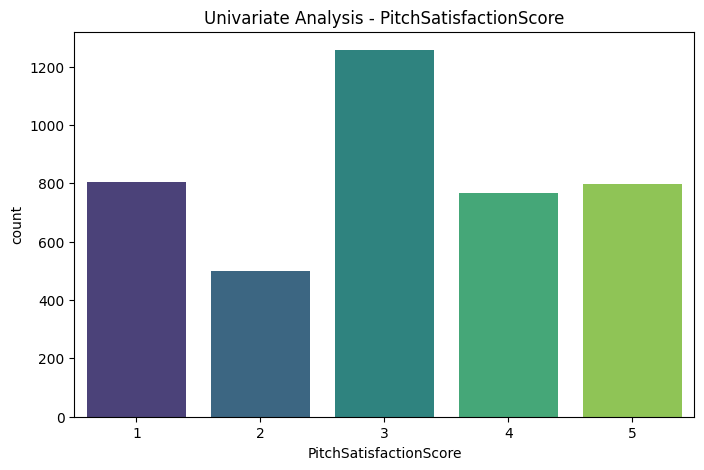

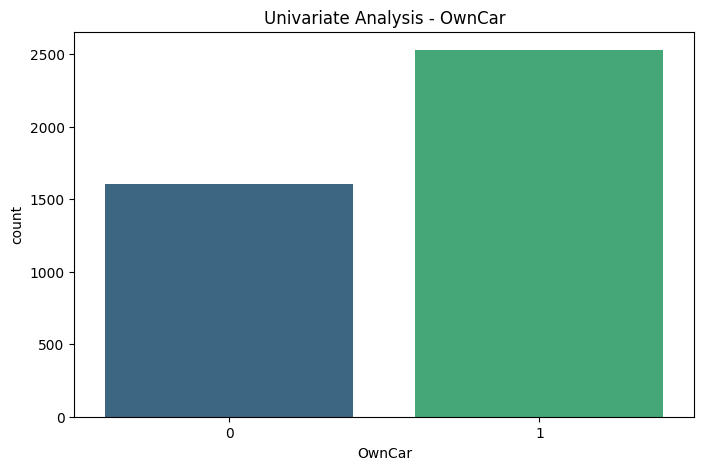

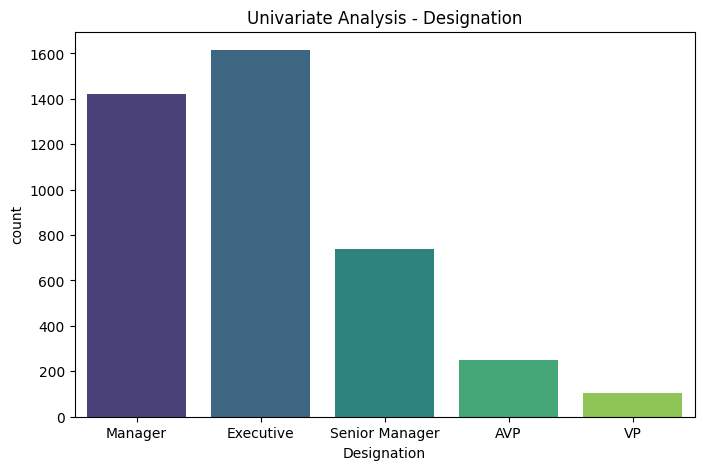

In [ ]:
# Univariate Analysis for categorical columns
for cat_cols in cats:
  plt.figure(figsize = (8,5))
  sns.countplot(x = cat_cols , data = df , palette = 'viridis')
  plt.title(f'Univariate Analysis - {cat_cols}')
  plt.show()

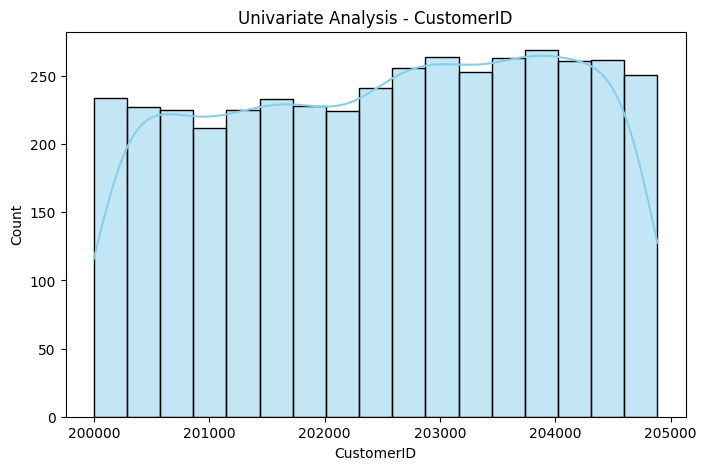

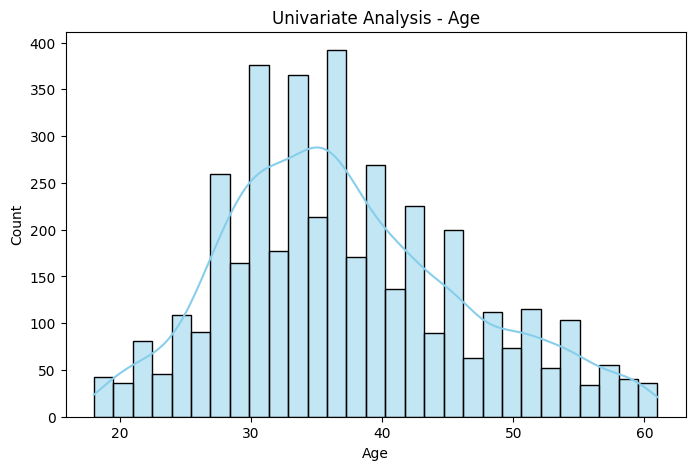

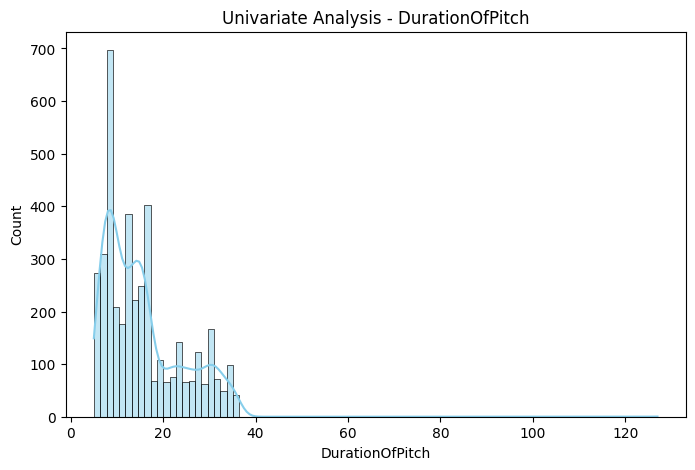

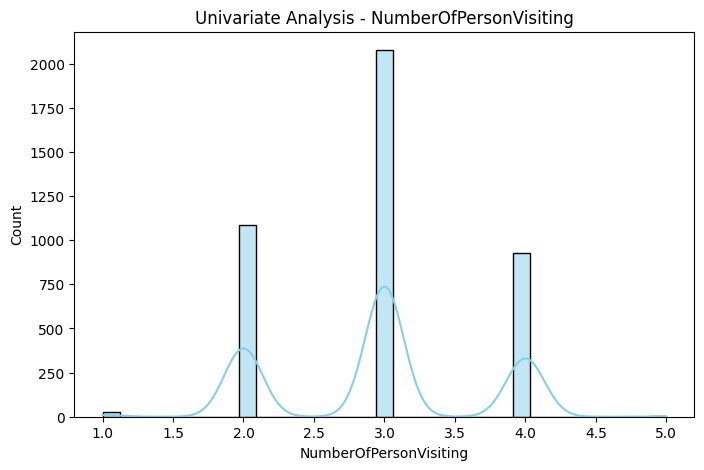

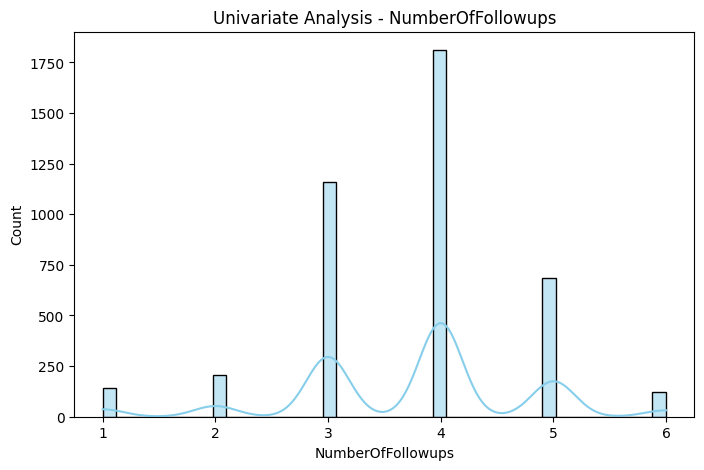

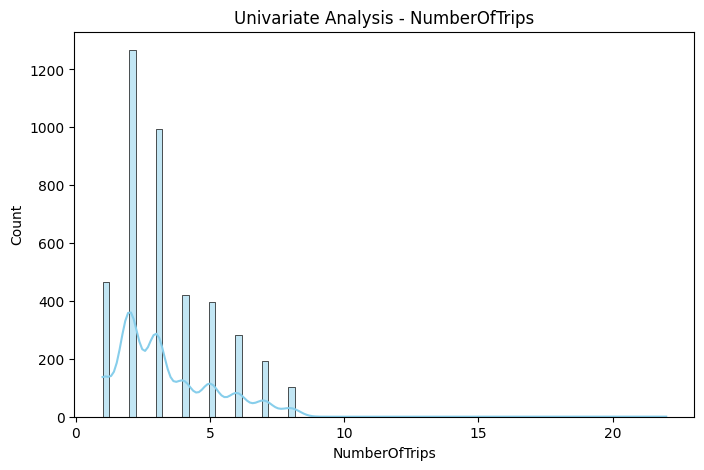

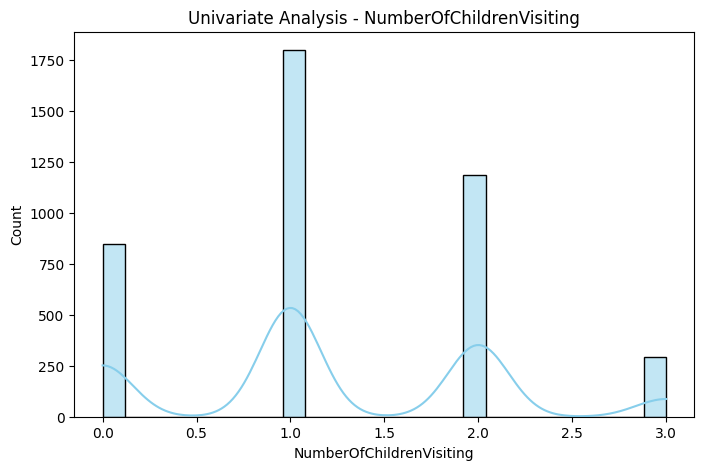

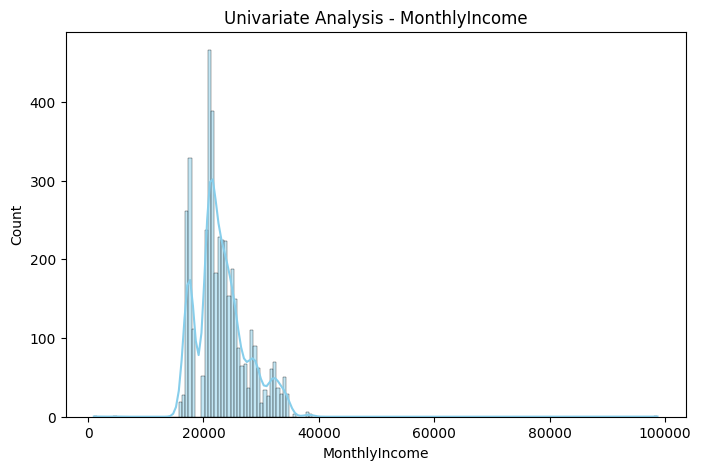

In [ ]:
# Univariate Analysis for numerical columns
for num_cols in nums:
  plt.figure(figsize = (8,5))
  sns.histplot(df[num_cols] , kde = True , color = 'skyblue')
  plt.title(f'Univariate Analysis - {num_cols}')
  plt.show()

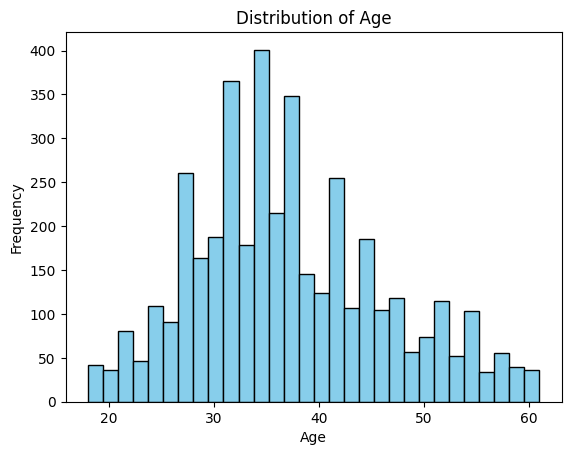

In [ ]:
plt.hist(df['Age'].dropna() , bins = 30 , color = 'skyblue' , edgecolor = 'black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# INSIGHT --> Age of 30 to 40 people are travelling more

In [ ]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [ ]:
df[cats].describe().T

,count,unique,top,freq
ProdTaken,4128,2,0,3331
TypeofContact,4128,2,Self Enquiry,2918
CityTier,4128,3,1,2678
Occupation,4128,4,Salaried,1999
Gender,4128,2,Male,2463
ProductPitched,4128,5,Basic,1615
PreferredPropertyStar,4128.0,3.0,3.0,2541.0
MaritalStatus,4128,4,Married,1990
Passport,4128,2,0,2909
PitchSatisfactionScore,4128,5,3,1257


In [ ]:
# To make sure categorical columns treated as categorical ,
# converted to objects as we have made the bifurcation of cat num columns manually
df[cats] = df[cats].astype('object')

In [ ]:
df[cats].describe().T

,count,unique,top,freq
ProdTaken,4128,2,0,3331
TypeofContact,4128,2,Self Enquiry,2918
CityTier,4128,3,1,2678
Occupation,4128,4,Salaried,1999
Gender,4128,2,Male,2463
ProductPitched,4128,5,Basic,1615
PreferredPropertyStar,4128.0,3.0,3.0,2541.0
MaritalStatus,4128,4,Married,1990
Passport,4128,2,0,2909
PitchSatisfactionScore,4128,5,3,1257


In [ ]:
for i in df[cats].columns:
  x = df[i].unique()
  print(f'{i} : {x}')
  print()

ProdTaken : [1 0]

TypeofContact : ['Self Enquiry' 'Company Invited']

CityTier : [3 1 2]

Occupation : ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender : ['Female' 'Male']

ProductPitched : ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

PreferredPropertyStar : [3.0 4.0 5.0]

MaritalStatus : ['Single' 'Divorced' 'Married' 'Unmarried']

Passport : [1 0]

PitchSatisfactionScore : [2 3 5 4 1]

OwnCar : [1 0]

Designation : ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']



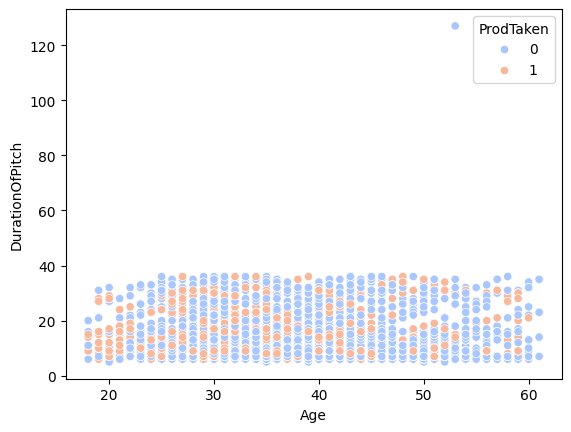

In [ ]:
# Bivariate Analysis
sns.scatterplot(x = 'Age' , y = 'DurationOfPitch' , data = df , hue = 'ProdTaken' , palette = 'coolwarm')
plt.xlabel='Age'
plt.ylabel='DurationOfPitch'
plt.show()

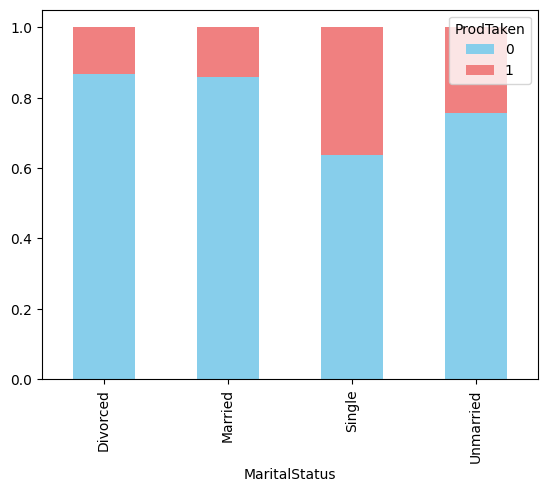

In [ ]:
cross_tab = pd.crosstab(df['MaritalStatus'] , df['ProdTaken'] , normalize = 'index')

cross_tab.plot(kind = 'bar' , stacked = True , color = ['skyblue' , 'lightcoral'])
plt.xlabel = 'MaritalStatus'
plt.show()

In [ ]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<Axes: xlabel='ProductPitched', ylabel='PitchSatisfactionScore'>

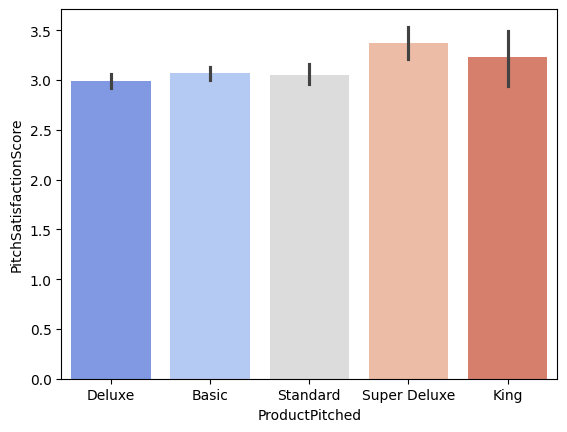

In [ ]:
sns.barplot(x = 'ProductPitched' , y = 'PitchSatisfactionScore' , data = df , palette = 'coolwarm')

<Axes: xlabel='NumberOfFollowups', ylabel='PitchSatisfactionScore'>

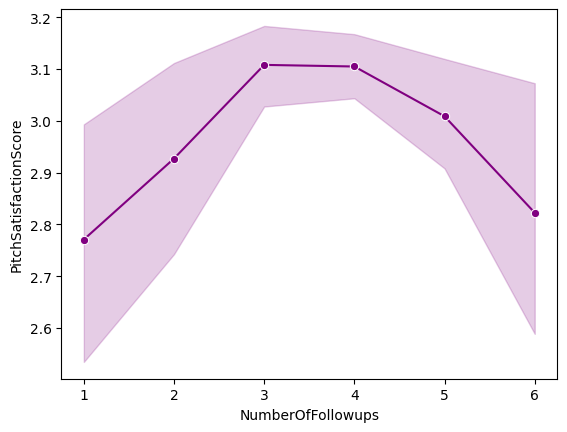

In [ ]:
sns.lineplot(x = 'NumberOfFollowups' , y = 'PitchSatisfactionScore' , data = df , marker = 'o' , color = 'purple')

<Axes: xlabel='ProdTaken', ylabel='Age'>

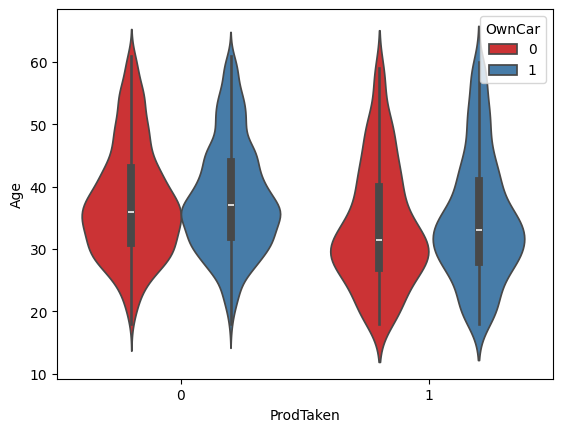

In [ ]:
# Multivariate Analysis
sns.violinplot(x = 'ProdTaken' , y = 'Age' , data = df ,hue = 'OwnCar' , palette = 'Set1')

<Axes: xlabel='Gender', ylabel='Age'>

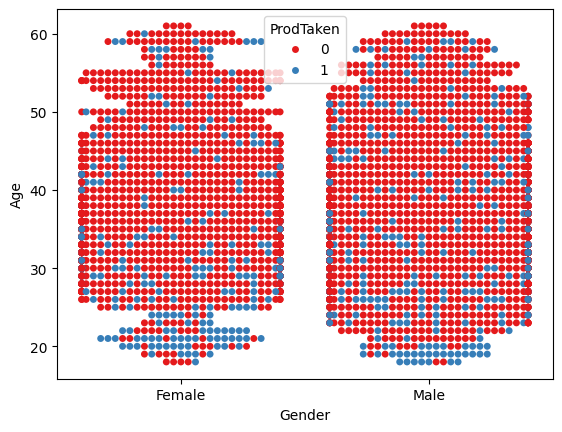

In [ ]:
# Multivariate Analysis
sns.swarmplot(x = 'Gender' , y = 'Age' , data = df ,hue = 'ProdTaken' , palette = 'Set1')

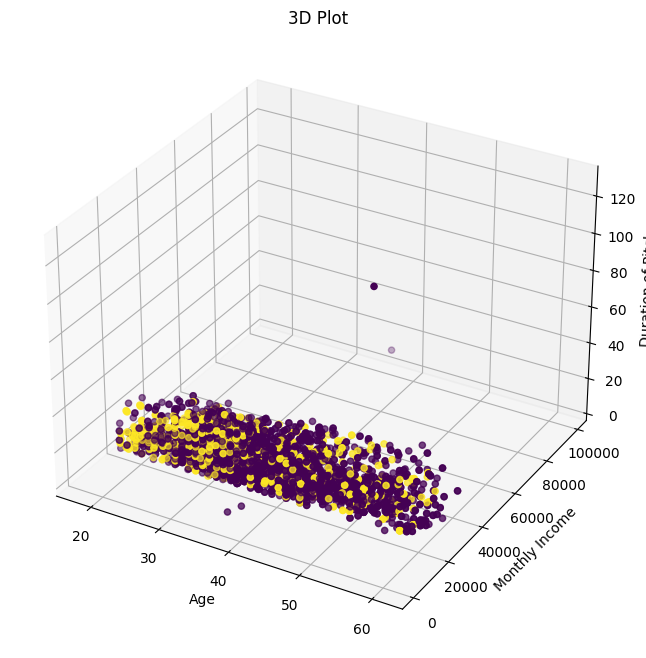

In [ ]:
# 3D Plots
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111 , projection = '3d')
ax.scatter(df['Age'] , df['MonthlyIncome'] , df['DurationOfPitch'] , c = df['ProdTaken'] , cmap = 'viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Monthly Income')
ax.set_zlabel('Duration of Pitch')
ax.set_title('3D Plot')
plt.show()

<Axes: >

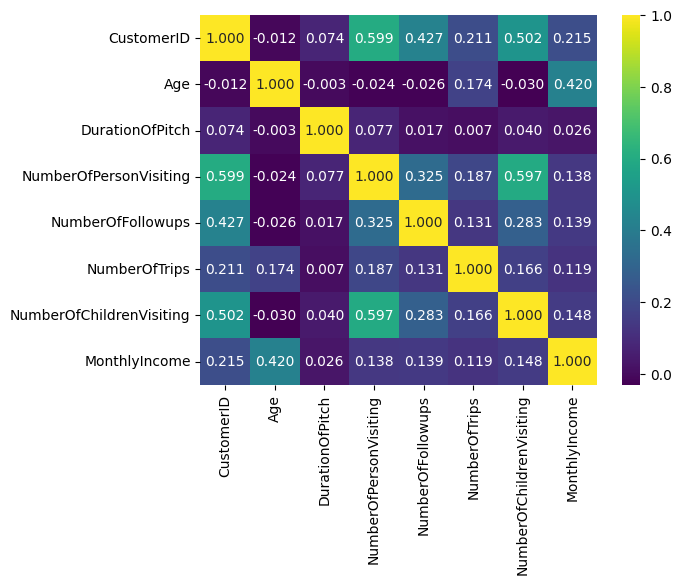

In [ ]:
# Heat Map
numeric_cols = df.select_dtypes(include = 'number')
sns.heatmap(numeric_cols.corr() , cmap = 'viridis' , annot = True , fmt = '.3f')

In [ ]:
# Feature Engineering

In [ ]:
df.drop('CustomerID' , inplace = True , axis = 1)
df.columns

KeyError: "['CustomerID'] not found in axis"

In [ ]:
df['TotalVisitors'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisitors
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0,4.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0,6.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,7.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0,5.0


In [ ]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of Numerical Features are : ',len(num_features))

Number of Numerical Features are :  8


In [ ]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of Categorical Features are : ',len(cat_features))

Number of Categorical Features are :  12


In [ ]:
descrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print('Descrete Features are : ',len(descrete_features))

Descrete Features are :  5


In [ ]:
# Train Test Split

from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('ProdTaken' , axis = 1)
y = df['ProdTaken']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1)

In [ ]:
X_train.shape , X_test.shape

((3302, 19), (826, 19))

In [ ]:
cat_features = X.select_dtypes(include = 'object').columns
num_features = X.select_dtypes(exclude = 'object').columns

In [ ]:
# Scaling --> Numerical Features
# Categorical --> OneHotEncoding

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

scaling = StandardScaler()
encoding = OneHotEncoder(drop = 'first') # If there are n features then n-1 dummy features will only make sense

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder' , encoding , cat_features),
        ('StandardScaler' , scaling , num_features)
    ]
)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome',
       'TotalVisitors'],
      dtype='object'))])

In [ ]:
X_train = preprocessor.fit_transform(X_train)

In [ ]:
X_test = preprocessor.transform(X_test)